In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# 1 Linear regression problem using the Normal Equations approach
Write a Python program to solve the linear regression problem using the Normal Equations approach.
Compare your results with the results you obtained in the last homework assignment.


      Answer:
              With Libraries:
              For Test Data: MSE = 93.61873598596337, R_square = 0.6352987285077925
              For Train Data: MSE = 113.39276287915223, R_square = 0.6066613439796211

              With Normal Equations:
              For Test Data: MSE = 93.61873598589403, R_square = 0.6123584973722804
              For Train Data: MSE = 174.86705527738576, R_square = 0.6498681298417482

              So we can see overall libraries are efficient

For Test Data: MSE = 93.61873598589403 R_square = 0.6123584973722804
For Train Data: MSE = 174.86705527738576 R_square = 0.6498681298417482


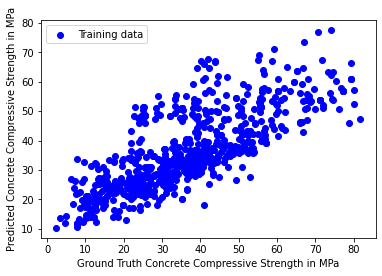

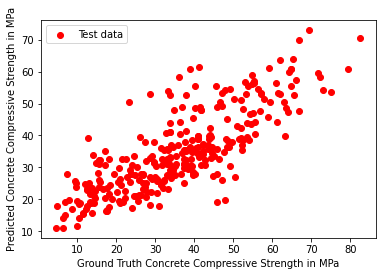

In [ ]:
# Loading Data
CD = pd.read_csv('Concrete_Data.csv')
def LoadData(CD):
  X = CD.iloc[:, 0:-1].values
  Y = CD.iloc[:, -1].values
  return X, Y

# Split Data into train and test
def split_Data(X, Y):
  X1 = np.vstack((np.ones(X.shape[0]), X.T)).T
  X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=0)
  X_train.shape[0]/(X_test.shape[0]+X_train.shape[0])
  return X_train, X_test, Y_train, Y_test

# Model
def LinearRegression(X_train, Y_train):
  W = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)),np.dot(X_train.T,Y_train))
  return W

# Predict
def predict(X_test , W):
  Y_predict = np.dot(X_test, W)
  return Y_predict

# Loss
def R_squared(Y_pred, Y_test):
  error1 = []
  error2 = []
  Y_mean = np.mean(Y_test)
  for i, j in zip(Y_pred, Y_test):
    err1 = (i - Y_mean)**2
    err2 = (j - Y_mean)**2
    error1.append(err1)
    error2.append(err2)
  E1 = np.array(error1)
  E2 = np.array(error2)
  return np.sum(E1)/np.sum(E2)

def MSE(Y_pred, Y_test):
  error = []
  for i, j in zip(Y_pred, Y_test):
    err = (i - j)**2
    error.append(err)
  E = np.array(error)
  return np.sum(E)/Y_pred.shape[0]

# Plotting
def plotting():
  plt.scatter(Y_train, Y_pred_train, c='blue', label='Training data')
  plt.xlabel('Ground Truth Concrete Compressive Strength in MPa')
  plt.ylabel('Predicted Concrete Compressive Strength in MPa')
  plt.legend()
  plt.show()

  plt.scatter(Y_test, Y_pred, c='red', label='Test data')
  plt.xlabel('Ground Truth Concrete Compressive Strength in MPa')
  plt.ylabel('Predicted Concrete Compressive Strength in MPa')
  plt.legend()
  plt.show()

X, Y = LoadData(pd.read_csv('Concrete_Data.csv'))
X_train, X_test, Y_train, Y_test = split_Data(X, Y)
W = LinearRegression(X_train, Y_train)
Y_pred = predict(X_test , W)
error = MSE(Y_pred, Y_test)
r_2 = R_squared(Y_pred, Y_test)
print('For Test Data:', 'MSE =', error, 'R_square =', r_2)

Y_pred_train = predict(X_train , W)
error_train = MSE(Y_pred_train, Y_test)
r_2_train = R_squared(Y_pred_train, Y_test)
print('For Train Data:', 'MSE =', error_train, 'R_square =', r_2_train)
plotting()

# 2 L2 regularization
Introduce L2 regularization into the model and solve this for various values
of the regularization parameter.

a. Do your results improve or degrade in quality?
    
       Ans: With results we can see regularisation improves results

            Without Regularisation:
            For Test Data: MSE = 93.61873598589403, R_square = 0.6123584973722804

            With Regularisation(Lambda = 100):
            For Test Data: MSE = 93.22218046728942 R_square = 0.6113048527759205



b. Explain the increase or decrease in quality obtained in part a in a
sentence or two.

        Ans: 1. As we know linear regression can have overfitting problem.
            And Regularisation is not built in normal equation it is more probable to have overfitting
            2. That can cause when we give input as Test Data it will give more error
            3. We can see both MSE and R_square are reduced with Regularisation

For Test Data: MSE = 93.22218046728942 R_square = 0.6113048527759205
For Train Data: MSE = 175.03050083479604 R_square = 0.6461782746354229


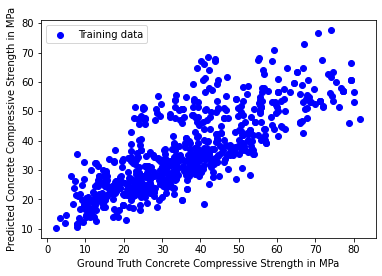

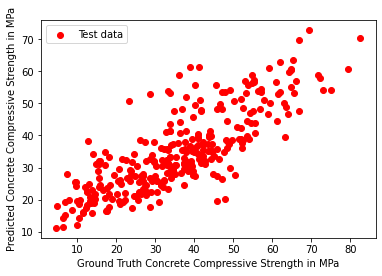

In [ ]:
# Loading Data
CD = pd.read_csv('Concrete_Data.csv')
def LoadData(CD):
  X = CD.iloc[:, 0:-1].values
  Y = CD.iloc[:, -1].values
  return X, Y

# Split Data into train and test
def split_Data(X, Y):
  X1 = np.vstack((np.ones(X.shape[0]), X.T)).T
  X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=0)
  X_train.shape[0]/(X_test.shape[0]+X_train.shape[0])
  return X_train, X_test, Y_train, Y_test

# Model
def LinearRegression1(X_train, Y_train, lam):
  R = lam * np.eye(X_train.shape[1])
  W = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)+ R),np.dot(X_train.T,Y_train))
  return W

# Predict
def predict(X_test , W):
  Y_predict = np.dot(X_test, W)
  return Y_predict

# Loss
def R_squared(Y_pred, Y_test):
  error1 = []
  error2 = []
  Y_mean = np.mean(Y_test)
  for i, j in zip(Y_pred, Y_test):
    err1 = (i - Y_mean)**2
    err2 = (j - Y_mean)**2
    error1.append(err1)
    error2.append(err2)
  E1 = np.array(error1)
  E2 = np.array(error2)
  return np.sum(E1)/np.sum(E2)

def MSE(Y_pred, Y_test):
  error = []
  for i, j in zip(Y_pred, Y_test):
    err = (i - j)**2
    error.append(err)
  E = np.array(error)
  return np.sum(E)/Y_pred.shape[0]

# Plotting
def plotting():
  plt.scatter(Y_train, Y_pred_train, c='blue', label='Training data')
  plt.xlabel('Ground Truth Concrete Compressive Strength in MPa')
  plt.ylabel('Predicted Concrete Compressive Strength in MPa')
  plt.legend()
  plt.show()

  plt.scatter(Y_test, Y_pred, c='red', label='Test data')
  plt.xlabel('Ground Truth Concrete Compressive Strength in MPa')
  plt.ylabel('Predicted Concrete Compressive Strength in MPa')
  plt.legend()
  plt.show()

X, Y = LoadData(pd.read_csv('Concrete_Data.csv'))
X_train, X_test, Y_train, Y_test = split_Data(X, Y)
W = LinearRegression1(X_train, Y_train, 100)
Y_pred = predict(X_test , W)
error = MSE(Y_pred, Y_test)
r_2 = R_squared(Y_pred, Y_test)
print('For Test Data:', 'MSE =', error, 'R_square =', r_2)

Y_pred_train = predict(X_train , W)
error_train = MSE(Y_pred_train, Y_test)
r_2_train = R_squared(Y_pred_train, Y_test)
print('For Train Data:', 'MSE =', error_train, 'R_square =', r_2_train)
plotting()

# 3. Quadratic & Cubic Model
a. How many features does the input have now?

    Ans: Features = 45

b. Modify your program for this quadratic model now (without
regularization)

    Ans: Program after question

c. Do your results improve or degrade in quality?

    Ans:
    Quadratic Regression:
    For Test Data: MSE = 61.920169430803675 R_square = 0.8946723920410492

    Linear Regression:
    For Test Data: MSE = 93.61873598589403, R_square = 0.6123584973722804

    It improves with respect to MSE but not good with respect to R_square

d. How many features would you need if this was a cubic model
instead of quadratic? (You need not program the cubic model)

    Ans: Features = 165 will be required


Quadratic Model (without regularization)

For Test Data: MSE = 61.920169430803675 R_square = 0.8946723920410492
For Train Data: MSE = 193.7946416765802 R_square = 0.9035479118001165


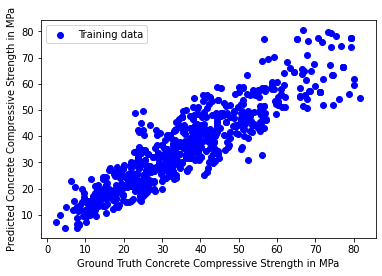

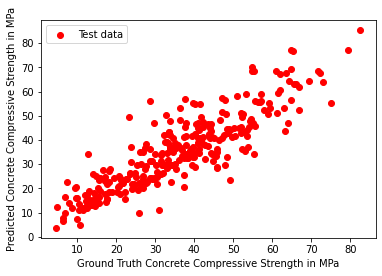

In [ ]:
CD = pd.read_csv('Concrete_Data.csv')
def LoadData(CD):
  X = CD.iloc[:, 0:-1].values
  Y = CD.iloc[:, -1].values
  return X, Y
X, Y = LoadData(CD)

def PolynomialFeatures1(X):
  def forarray(X):
    P = []
    for i in range(len(X)):
      for j in range(i,len(X)):
        v = X[i]*X[j]
        P.append(v)
    return P
  P = np.apply_along_axis(forarray, 1, X)
  def forAll(P, X):
    T = np.ones(X.shape[0])
    X_poly = np.vstack((T, X.T, P.T)).T
    return X_poly
  X_poly = forAll(P, X)
  return X_poly

X_poly = PolynomialFeatures1(X)

def preprocess_data(X_poly, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state = 0)
  return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = preprocess_data(X_poly, Y)

def LinearRegression1(X_train, Y_train):
  W = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)),np.dot(X_train.T,Y_train))
  return W
W = LinearRegression1(X_train, Y_train)

# Predict
def predict(X_test , W):
  Y_predict = np.dot(X_test, W)
  return Y_predict

# Loss
def R_squared(Y_pred, Y_test):
  error1 = []
  error2 = []
  Y_mean = np.mean(Y_test)
  for i, j in zip(Y_pred, Y_test):
    err1 = (i - Y_mean)**2
    err2 = (j - Y_mean)**2
    error1.append(err1)
    error2.append(err2)
  E1 = np.array(error1)
  E2 = np.array(error2)
  return np.sum(E1)/np.sum(E2)

def MSE(Y_pred, Y_test):
  error = []
  for i, j in zip(Y_pred, Y_test):
    err = (i - j)**2
    error.append(err)
  E = np.array(error)
  return np.sum(E)/Y_pred.shape[0]

# Plotting
def plotting():
  plt.scatter(Y_train, Y_pred_train, c='blue', label='Training data')
  plt.xlabel('Ground Truth Concrete Compressive Strength in MPa')
  plt.ylabel('Predicted Concrete Compressive Strength in MPa')
  plt.legend()
  plt.show()

  plt.scatter(Y_test, Y_pred, c='red', label='Test data')
  plt.xlabel('Ground Truth Concrete Compressive Strength in MPa')
  plt.ylabel('Predicted Concrete Compressive Strength in MPa')
  plt.legend()
  plt.show()

X, Y = LoadData(pd.read_csv('Concrete_Data.csv'))
X_poly = PolynomialFeatures1(X)
X_train, X_test, Y_train, Y_test = preprocess_data(X_poly, Y)
W = LinearRegression1(X_train, Y_train)
Y_pred = predict(X_test , W)
error = MSE(Y_pred, Y_test)
r_2 = R_squared(Y_pred, Y_test)
Y_pred_train = predict(X_train , W)
error_train = MSE(Y_pred_train, Y_test)
r_2_train = R_squared(Y_pred_train, Y_test)
print('For Test Data:', 'MSE =', error, 'R_square =', r_2)
print('For Train Data:', 'MSE =', error_train, 'R_square =', r_2_train)
plotting()

# 4 We will provide details of the submission process later in class.